# Keras Datasets
In these first few tutorials we will simply use some built in keras datasets which will make loading data fairly easy. The dataset we will use to start is the Fashion MNIST datset. This dataset contains 60000 images of different clothing/apparel items. The goal of our network will be to look at these images and classify them appropriately To load our first dataset in we will do the following:

In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

# Get the fashion_mnist dataset
data = keras.datasets.fashion_mnist

# Split data in train and test
(train_images, train_labels), (test_images, test_labels) = data.load_data()

# Separate the classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Scale down the images for a range between 0 and 1 by diving the value of the images
train_images = train_images/255.0
test_images = test_images/255.0

In [2]:
model = keras.Sequential([
	keras.layers.Flatten(input_shape=(28,28)),
	keras.layers.Dense(128, activation="relu"),
	keras.layers.Dense(10, activation="softmax")
	])

In [3]:
# Be careful to avoid overfitting (change Epoch if needed)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5026 - accuracy: 0.8241
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3781 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3377 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3144 - accuracy: 0.8829
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8918


In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3648 - accuracy: 0.8701

Test accuracy: 0.8701000213623047


In [5]:
predictions = model.predict(test_images)

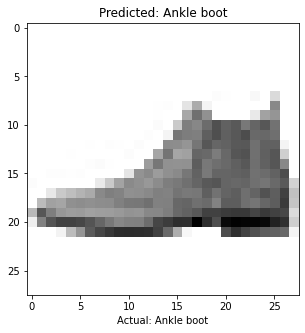

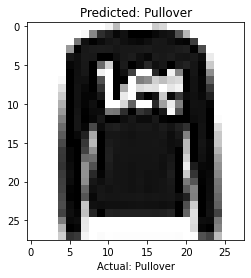

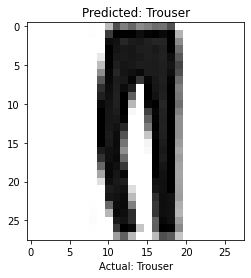

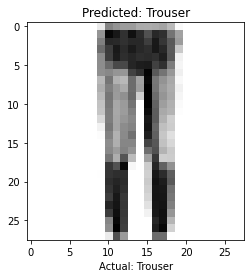

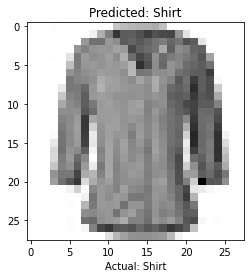

In [6]:
plt.figure(figsize=(5,5))
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Predicted: " + class_names[np.argmax(predictions[i])])
    plt.show()